In [4]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

## Set up parameters, create isochrone grid

In [5]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F182M']
filters = ['m_jwst_F115W', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [6]:
# read nbody data
path_to_data = '../../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma0p1/fiducial/sfe_ff001/00/'
snapshot = Reader.read_snapshot(path_to_data, time = 20)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

        mass        isMultiple        compMass             systemMass              e                 log_a               age        
------------------- ---------- ---------------------- ------------------- -------------------- ------------------ ------------------
0.06895842179945424        0.0                     [] 0.06895842179945424                  nan                nan  18.62630555946738
0.08626887187757219        0.0                     [] 0.08626887187757219                  nan                nan  3.069082513027311
  2.326448478984193        0.0                     []   2.326448478984193                  nan                nan  18.33038253724003
0.04093112166717806        0.0                     [] 0.04093112166717806                  nan                nan  3.069082513027311
                ...        ...                    ...                 ...                  ...                ...                ...
0.03156546631062232        1.0 [0.017415375068988628] 0.0489808413796

In [7]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.39794001 6.47712125 6.54406804 6.60205999 6.65321251 6.69897
 6.74036269 6.77815125 6.81291336 6.84509804 6.87506126 6.90308999
 6.92941893 6.95424251 6.97772361 7.         7.0211893  7.04139269
 7.06069784 7.07918125 7.09691001 7.11394335 7.13033377 7.14612804
 7.161368   7.17609126 7.1903317  7.20411998 7.21748394 7.23044892
 7.24303805 7.25527251 7.26717173 7.2787536  7.29003461 7.30103
 7.31175386]
[ 2500000.  3000000.  3500000.  4000000.  4500000.  5000000.  5500000.
  6000000.  6500000.  7000000.  7500000.  8000000.  8500000.  9000000.
  9500000. 10000000. 10500000. 11000000. 11500000. 12000000. 12500000.
 13000000. 13500000. 14000000. 14500000. 15000000. 15500000. 16000000.
 16500000. 17000000. 17500000. 18000000. 18500000. 19000000. 19500000.
 20000000. 20500000.]


In [8]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Changing to logg=4.50 for T= 39293 logg=4.00
Changing to logg=4.50 for T= 39737 logg=3.99
Changing to logg=4.50 for T= 40206 logg=3.98
Changing to logg=4.50 for T= 40487 logg=3.97
Changing to logg=4.50 for T= 40764 logg=3.97
Changing to logg=4.50 for T= 41036 logg=3.95
Changing to logg=4.50 for T= 41298 logg=3.94
Changing to logg=4.50 for T= 41548 logg=3.93
Changing to logg=4.50 for T= 41810 logg=3.92
Changing to logg=4.50 for T= 42053 logg=3.90
Changing to logg=4.50 for T= 42247 logg=3.88
Changing to logg=4.50 for T= 42389 logg=3.86
Changing to logg=4.50 for T= 42598 logg=3.83
Changing to logg=4.50 for T= 43046 logg=3.82
Changing to logg=4.50 for T= 44070 logg=3.81
Changing to logg=4.50 for T= 44382 logg=3.80
Changing to logg=4.50 for T= 44435 logg=3.80
Changing to logg=4.50 for T= 44490 logg=3.79
Changing to logg=4.50 for T= 44532 logg=3.78
Changing to T= 50000 for T= 55470 logg=4.05
Changing to logg=5.00 for T= 55470 logg=4.05
Changing to T= 50000 for T= 56402 logg=4.07
Changing to 

Changing to T= 50000 for T= 67541 logg=4.29
Changing to logg=5.00 for T= 67541 logg=4.29
Changing to T= 50000 for T= 68089 logg=4.30
Changing to logg=5.00 for T= 68089 logg=4.30
Changing to T= 50000 for T= 68666 logg=4.32
Changing to logg=5.00 for T= 68666 logg=4.32
Changing to T= 50000 for T= 69275 logg=4.33
Changing to logg=5.00 for T= 69275 logg=4.33
Changing to T= 50000 for T= 69901 logg=4.35
Changing to logg=5.00 for T= 69901 logg=4.35
Changing to T= 50000 for T= 70543 logg=4.36
Changing to logg=5.00 for T= 70543 logg=4.36
Changing to T= 50000 for T= 71202 logg=4.38
Changing to logg=5.00 for T= 71202 logg=4.38
Changing to T= 50000 for T= 71872 logg=4.39
Changing to logg=5.00 for T= 71872 logg=4.39
Changing to T= 50000 for T= 72550 logg=4.41
Changing to logg=5.00 for T= 72550 logg=4.41
Changing to T= 50000 for T= 73235 logg=4.42
Changing to logg=5.00 for T= 73235 logg=4.42
Changing to T= 50000 for T= 73926 logg=4.44
Changing to logg=5.00 for T= 73926 logg=4.44
Changing to T= 50000 

Changing to T= 50000 for T=112623 logg=5.09
Changing to logg=5.00 for T=112623 logg=5.09
Changing to T= 50000 for T=112616 logg=5.09
Changing to logg=5.00 for T=112616 logg=5.09
Changing to T= 50000 for T=112607 logg=5.09
Changing to logg=5.00 for T=112607 logg=5.09
Changing to T= 50000 for T=112597 logg=5.09
Changing to logg=5.00 for T=112597 logg=5.09
Changing to T= 50000 for T=112587 logg=5.09
Changing to logg=5.00 for T=112587 logg=5.09
Changing to T= 50000 for T=112576 logg=5.09
Changing to logg=5.00 for T=112576 logg=5.09
Changing to T= 50000 for T=112564 logg=5.09
Changing to logg=5.00 for T=112564 logg=5.09
Changing to T= 50000 for T=112551 logg=5.09
Changing to logg=5.00 for T=112551 logg=5.09
Changing to T= 50000 for T=112538 logg=5.09
Changing to logg=5.00 for T=112538 logg=5.09
Changing to T= 50000 for T=112524 logg=5.09
Changing to logg=5.00 for T=112524 logg=5.09
Changing to T= 50000 for T=112509 logg=5.09
Changing to logg=5.00 for T=112509 logg=5.09
Changing to T= 50000 

Changing to T= 50000 for T=110159 logg=5.02
Changing to logg=5.00 for T=110159 logg=5.02
Changing to T= 50000 for T=110128 logg=5.02
Changing to logg=5.00 for T=110128 logg=5.02
Changing to T= 50000 for T=110096 logg=5.02
Changing to logg=5.00 for T=110096 logg=5.02
Changing to T= 50000 for T=110065 logg=5.02
Changing to logg=5.00 for T=110065 logg=5.02
Changing to T= 50000 for T=110034 logg=5.02
Changing to logg=5.00 for T=110034 logg=5.02
Changing to T= 50000 for T=110003 logg=5.02
Changing to logg=5.00 for T=110003 logg=5.02
Changing to T= 50000 for T=109972 logg=5.02
Changing to logg=5.00 for T=109972 logg=5.02
Changing to T= 50000 for T=109942 logg=5.02
Changing to logg=5.00 for T=109942 logg=5.02
Changing to T= 50000 for T=109912 logg=5.01
Changing to logg=5.00 for T=109912 logg=5.01
Changing to T= 50000 for T=109882 logg=5.01
Changing to logg=5.00 for T=109882 logg=5.01
Changing to T= 50000 for T=109852 logg=5.01
Changing to logg=5.00 for T=109852 logg=5.01
Changing to T= 50000 

M =   2.639 Msun  T =  9360 K  m_jwst_F182M = 8.30
M =   7.445 Msun  T = 21404 K  m_jwst_F182M = 7.25
M = 103.009 Msun  T = 58412 K  m_jwst_F182M = 3.59
M = 139.953 Msun  T = 112608 K  m_jwst_F182M = 6.65
M = 140.007 Msun  T = 110414 K  m_jwst_F182M = 6.47
      Time taken: 21.59 seconds
Changing to logg=4.00 for T= 35119 logg=4.00
Changing to logg=4.00 for T= 35444 logg=3.99
Changing to logg=4.00 for T= 35762 logg=3.98
Changing to logg=4.00 for T= 36158 logg=3.96
Changing to logg=4.00 for T= 36596 logg=3.94
Changing to logg=4.00 for T= 36831 logg=3.93
Changing to logg=4.00 for T= 37051 logg=3.92
Changing to logg=4.00 for T= 37222 logg=3.90
Changing to logg=4.00 for T= 37366 logg=3.89
Changing to logg=4.00 for T= 37483 logg=3.87
Changing to logg=4.00 for T= 37567 logg=3.85
Changing to logg=4.00 for T= 37806 logg=3.83
Changing to logg=4.00 for T= 37901 logg=3.81
Changing to logg=4.00 for T= 37907 logg=3.79
Changing to logg=4.00 for T= 37889 logg=3.77
Changing to logg=4.00 for T= 37847 l

Changing to T= 50000 for T=103792 logg=4.99
Changing to logg=5.00 for T=103792 logg=4.99
Changing to T= 50000 for T=103744 logg=4.99
Changing to logg=5.00 for T=103744 logg=4.99
Changing to T= 50000 for T=103697 logg=4.99
Changing to logg=5.00 for T=103697 logg=4.99
Changing to T= 50000 for T=103649 logg=4.99
Changing to logg=5.00 for T=103649 logg=4.99
Changing to T= 50000 for T=103602 logg=4.99
Changing to logg=5.00 for T=103602 logg=4.99
Changing to T= 50000 for T=103554 logg=4.99
Changing to logg=5.00 for T=103554 logg=4.99
Changing to T= 50000 for T=103507 logg=4.98
Changing to logg=5.00 for T=103507 logg=4.98
Changing to T= 50000 for T=103459 logg=4.98
Changing to logg=5.00 for T=103459 logg=4.98
Changing to T= 50000 for T=103412 logg=4.98
Changing to logg=5.00 for T=103412 logg=4.98
Changing to T= 50000 for T=103359 logg=4.98
Changing to logg=5.00 for T=103359 logg=4.98
Changing to T= 50000 for T=103300 logg=4.98
Changing to logg=5.00 for T=103300 logg=4.98
Changing to T= 50000 

Changing to T= 50000 for T= 96946 logg=4.81
Changing to logg=5.00 for T= 96946 logg=4.81
Changing to T= 50000 for T= 96863 logg=4.80
Changing to logg=5.00 for T= 96863 logg=4.80
Changing to T= 50000 for T= 96780 logg=4.80
Changing to logg=5.00 for T= 96780 logg=4.80
Changing to T= 50000 for T= 96697 logg=4.80
Changing to logg=5.00 for T= 96697 logg=4.80
Changing to T= 50000 for T= 96614 logg=4.80
Changing to logg=5.00 for T= 96614 logg=4.80
Changing to T= 50000 for T= 96531 logg=4.80
Changing to logg=5.00 for T= 96531 logg=4.80
Changing to T= 50000 for T= 96447 logg=4.79
Changing to logg=5.00 for T= 96447 logg=4.79
Changing to T= 50000 for T= 96364 logg=4.79
Changing to logg=5.00 for T= 96364 logg=4.79
Changing to T= 50000 for T= 96281 logg=4.79
Changing to logg=5.00 for T= 96281 logg=4.79
Changing to T= 50000 for T= 96198 logg=4.79
Changing to logg=5.00 for T= 96198 logg=4.79
Changing to T= 50000 for T= 96114 logg=4.79
Changing to logg=5.00 for T= 96114 logg=4.79
Changing to T= 50000 

Changing to T= 50000 for T=132885 logg=5.45
Changing to logg=5.00 for T=132885 logg=5.45
Changing to T= 50000 for T=132984 logg=5.45
Changing to logg=5.00 for T=132984 logg=5.45
Changing to T= 50000 for T=133219 logg=5.45
Changing to logg=5.00 for T=133219 logg=5.45
Changing to T= 50000 for T=133226 logg=5.46
Changing to logg=5.00 for T=133226 logg=5.46
Changing to T= 50000 for T=133153 logg=5.46
Changing to logg=5.00 for T=133153 logg=5.46
Changing to T= 50000 for T=133177 logg=5.46
Changing to logg=5.00 for T=133177 logg=5.46
Changing to T= 50000 for T=133221 logg=5.47
Changing to logg=5.00 for T=133221 logg=5.47
Changing to T= 50000 for T=133256 logg=5.47
Changing to logg=5.00 for T=133256 logg=5.47
Changing to T= 50000 for T=133279 logg=5.47
Changing to logg=5.00 for T=133279 logg=5.47
Changing to T= 50000 for T=133307 logg=5.48
Changing to logg=5.00 for T=133307 logg=5.48
Changing to T= 50000 for T=133291 logg=5.48
Changing to logg=5.00 for T=133291 logg=5.48
Changing to T= 50000 

Changing to T= 50000 for T=192002 logg=6.02
Changing to logg=5.00 for T=192002 logg=6.02
Changing to T= 50000 for T=192923 logg=6.03
Changing to logg=5.00 for T=192923 logg=6.03
Changing to T= 50000 for T=193846 logg=6.03
Changing to logg=5.00 for T=193846 logg=6.03
Changing to T= 50000 for T=194772 logg=6.04
Changing to logg=5.00 for T=194772 logg=6.04
Changing to T= 50000 for T=195696 logg=6.05
Changing to logg=5.00 for T=195696 logg=6.05
Changing to T= 50000 for T=196624 logg=6.05
Changing to logg=5.00 for T=196624 logg=6.05
Changing to T= 50000 for T=197551 logg=6.06
Changing to logg=5.00 for T=197551 logg=6.06
Changing to T= 50000 for T=198482 logg=6.07
Changing to logg=5.00 for T=198482 logg=6.07
Changing to T= 50000 for T=199408 logg=6.07
Changing to logg=5.00 for T=199408 logg=6.07
Changing to T= 50000 for T=200334 logg=6.08
Changing to logg=5.00 for T=200334 logg=6.08
Changing to T= 50000 for T=201252 logg=6.08
Changing to logg=5.00 for T=201252 logg=6.08
Changing to T= 50000 

Changing to logg=4.00 for T= 33588 logg=3.45
Changing to logg=4.00 for T= 33311 logg=3.42
Changing to logg=4.00 for T= 33028 logg=3.40
Changing to logg=4.00 for T= 32741 logg=3.38
Changing to logg=4.00 for T= 32450 logg=3.35
Changing to logg=4.00 for T= 32156 logg=3.33
Changing to logg=4.00 for T= 31859 logg=3.31
Changing to logg=4.00 for T= 31561 logg=3.28
Changing to logg=4.00 for T= 31261 logg=3.26
Changing to logg=3.50 for T= 30959 logg=3.23
Changing to logg=3.50 for T= 30657 logg=3.21
Changing to logg=3.50 for T= 30355 logg=3.19
Changing to logg=3.50 for T= 30052 logg=3.16
Changing to logg=3.50 for T= 29749 logg=3.14
Changing to logg=3.50 for T= 29447 logg=3.12
Changing to logg=3.50 for T= 29146 logg=3.10
Changing to logg=3.50 for T= 28846 logg=3.07
Changing to logg=3.50 for T= 28547 logg=3.05
Changing to logg=3.50 for T= 28249 logg=3.03
Changing to logg=3.50 for T= 27953 logg=3.00
Changing to logg=3.50 for T= 27659 logg=2.98
Changing to logg=3.50 for T= 27367 logg=2.96
Changing t

Changing to logg=2.00 for T=  9991 logg=1.08
Changing to logg=2.00 for T=  9925 logg=1.07
Changing to logg=2.00 for T=  9859 logg=1.06
Changing to logg=2.00 for T=  9794 logg=1.05
Changing to logg=2.00 for T=  9729 logg=1.04
Changing to logg=2.00 for T=  9664 logg=1.02
Changing to logg=2.00 for T=  9600 logg=1.01
Changing to logg=2.00 for T=  9537 logg=1.00
Changing to logg=2.00 for T=  9474 logg=0.99
Changing to logg=2.00 for T=  9411 logg=0.98
Changing to logg=2.00 for T=  9348 logg=0.97
Changing to logg=2.00 for T=  9287 logg=0.96
Changing to logg=2.00 for T=  9225 logg=0.94
Changing to logg=2.00 for T=  9164 logg=0.93
Changing to logg=2.00 for T=  9103 logg=0.92
Changing to logg=2.00 for T=  9043 logg=0.91
Changing to logg=1.50 for T=  8983 logg=0.90
Changing to logg=1.50 for T=  8923 logg=0.89
Changing to logg=1.50 for T=  8864 logg=0.87
Changing to logg=1.50 for T=  8806 logg=0.86
Changing to logg=1.50 for T=  8747 logg=0.85
Changing to logg=1.50 for T=  8690 logg=0.84
Changing t

Changing to T= 50000 for T=175770 logg=5.77
Changing to logg=5.00 for T=175770 logg=5.77
Changing to T= 50000 for T=176734 logg=5.78
Changing to logg=5.00 for T=176734 logg=5.78
Changing to T= 50000 for T=177701 logg=5.79
Changing to logg=5.00 for T=177701 logg=5.79
Changing to T= 50000 for T=178673 logg=5.79
Changing to logg=5.00 for T=178673 logg=5.79
Changing to T= 50000 for T=179649 logg=5.80
Changing to logg=5.00 for T=179649 logg=5.80
Changing to T= 50000 for T=180629 logg=5.81
Changing to logg=5.00 for T=180629 logg=5.81
Changing to T= 50000 for T=181614 logg=5.82
Changing to logg=5.00 for T=181614 logg=5.82
Changing to T= 50000 for T=182604 logg=5.83
Changing to logg=5.00 for T=182604 logg=5.83
Changing to T= 50000 for T=183597 logg=5.84
Changing to logg=5.00 for T=183597 logg=5.84
Changing to T= 50000 for T=184594 logg=5.84
Changing to logg=5.00 for T=184594 logg=5.84
Changing to T= 50000 for T=185595 logg=5.85
Changing to logg=5.00 for T=185595 logg=5.85
Changing to T= 50000 

Changing to T= 50000 for T=252594 logg=6.32
Changing to logg=5.00 for T=252594 logg=6.32
Isochrone generation took 49.217565 s.
Making photometry for isochrone: log(t) = 6.60  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 23:39:39.365889   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  2998 K  m_jwst_F115W = 14.96
M =   2.409 Msun  T = 10007 K  m_jwst_F115W = 8.88
M =   7.159 Msun  T = 20933 K  m_jwst_F115W = 7.16
M =  49.655 Msun  T = 29749 K  m_jwst_F115W = 1.85
M =  56.931 Msun  T = 16123 K  m_jwst_F115W = -0.32
M =  56.978 Msun  T =  8296 K  m_jwst_F115W = -2.24
M =  64.399 Msun  T = 68333 K  m_jwst_F115W = 3.96
M =  69.710 Msun  T = 223651 K  m_jwst_F115W = 9.18
Starting filter: jwst,F182M   Elapsed time: 13.96 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  2998 K  m_jwst_F182M = 14.19
M =   2.409 Msun  T = 10007 K  m_jwst_F182M = 8.90
M =   7.159 Msun  T = 20933 K  m_jwst_

Changing to logg=2.50 for T= 13936 logg=1.76
Changing to logg=2.50 for T= 13819 logg=1.75
Changing to logg=2.50 for T= 13702 logg=1.73
Changing to logg=2.50 for T= 13586 logg=1.72
Changing to logg=2.50 for T= 13470 logg=1.70
Changing to logg=2.50 for T= 13356 logg=1.69
Changing to logg=2.50 for T= 13243 logg=1.67
Changing to logg=2.50 for T= 13131 logg=1.66
Changing to logg=2.50 for T= 13020 logg=1.64
Changing to logg=2.50 for T= 12909 logg=1.63
Changing to logg=2.50 for T= 12800 logg=1.61
Changing to logg=2.50 for T= 12691 logg=1.60
Changing to logg=2.50 for T= 12584 logg=1.58
Changing to logg=2.50 for T= 12477 logg=1.57
Changing to logg=2.50 for T= 12371 logg=1.55
Changing to logg=2.50 for T= 12266 logg=1.54
Changing to logg=2.50 for T= 12162 logg=1.52
Changing to logg=2.50 for T= 12059 logg=1.51
Changing to logg=2.50 for T= 11956 logg=1.49
Changing to logg=2.50 for T= 11855 logg=1.48
Changing to logg=2.50 for T= 11754 logg=1.46
Changing to logg=2.00 for T= 11654 logg=1.45
Changing t

Changing to T= 50000 for T=104935 logg=4.93
Changing to logg=5.00 for T=104935 logg=4.93
Changing to T= 50000 for T=105421 logg=4.93
Changing to logg=5.00 for T=105421 logg=4.93
Changing to T= 50000 for T=105907 logg=4.94
Changing to logg=5.00 for T=105907 logg=4.94
Changing to T= 50000 for T=106366 logg=4.95
Changing to logg=5.00 for T=106366 logg=4.95
Changing to T= 50000 for T=106813 logg=4.95
Changing to logg=5.00 for T=106813 logg=4.95
Changing to T= 50000 for T=107260 logg=4.96
Changing to logg=5.00 for T=107260 logg=4.96
Changing to T= 50000 for T=107728 logg=4.97
Changing to logg=5.00 for T=107728 logg=4.97
Changing to T= 50000 for T=108209 logg=4.97
Changing to logg=5.00 for T=108209 logg=4.97
Changing to T= 50000 for T=108703 logg=4.98
Changing to logg=5.00 for T=108703 logg=4.98
Changing to T= 50000 for T=109198 logg=4.99
Changing to logg=5.00 for T=109198 logg=4.99
Changing to T= 50000 for T=109693 logg=4.99
Changing to logg=5.00 for T=109693 logg=4.99
Changing to T= 50000 

Changing to T= 50000 for T=142143 logg=5.37
Changing to logg=5.00 for T=142143 logg=5.37
Changing to T= 50000 for T=142719 logg=5.38
Changing to logg=5.00 for T=142719 logg=5.38
Changing to T= 50000 for T=143288 logg=5.39
Changing to logg=5.00 for T=143288 logg=5.39
Changing to T= 50000 for T=143852 logg=5.39
Changing to logg=5.00 for T=143852 logg=5.39
Isochrone generation took 48.322973 s.
Making photometry for isochrone: log(t) = 6.65  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 23:40:55.204628   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.107 Msun  T =  3003 K  m_jwst_F115W = 15.04
M =   2.306 Msun  T =  9312 K  m_jwst_F115W = 9.04
M =   7.092 Msun  T = 20808 K  m_jwst_F115W = 7.17
M =  42.523 Msun  T = 28376 K  m_jwst_F115W = 2.01
M =  46.065 Msun  T = 15044 K  m_jwst_F115W = -0.15
M =  46.118 Msun  T =  6418 K  m_jwst_F115W = -2.48
M =  50.747 Msun  T = 38771 K  m_jwst_F115W = 2.24
M =  53.670 Ms

Changing to logg=2.50 for T= 15287 logg=1.96
Changing to logg=2.50 for T= 15168 logg=1.95
Changing to logg=2.50 for T= 15049 logg=1.94
Changing to logg=2.50 for T= 14931 logg=1.92
Changing to logg=2.50 for T= 14814 logg=1.91
Changing to logg=2.50 for T= 14698 logg=1.90
Changing to logg=2.50 for T= 14582 logg=1.88
Changing to logg=2.50 for T= 14468 logg=1.87
Changing to logg=2.50 for T= 14354 logg=1.85
Changing to logg=2.50 for T= 14242 logg=1.84
Changing to logg=2.50 for T= 14130 logg=1.83
Changing to logg=2.50 for T= 14019 logg=1.81
Changing to logg=2.50 for T= 13909 logg=1.80
Changing to logg=2.50 for T= 13800 logg=1.79
Changing to logg=2.50 for T= 13691 logg=1.77
Changing to logg=2.50 for T= 13584 logg=1.76
Changing to logg=2.50 for T= 13477 logg=1.74
Changing to logg=2.50 for T= 13371 logg=1.73
Changing to logg=2.50 for T= 13266 logg=1.72
Changing to logg=2.50 for T= 13162 logg=1.70
Changing to logg=2.50 for T= 13058 logg=1.69
Changing to logg=2.50 for T= 12955 logg=1.67
Changing t

Changing to logg=2.50 for T= 15566 logg=1.69
Changing to logg=2.50 for T= 15527 logg=1.69
Changing to logg=2.50 for T= 15489 logg=1.68
Changing to logg=2.50 for T= 15464 logg=1.68
Changing to logg=2.50 for T= 15447 logg=1.68
Changing to logg=2.50 for T= 15439 logg=1.68
Changing to logg=2.50 for T= 15430 logg=1.68
Changing to logg=2.50 for T= 15420 logg=1.68
Changing to logg=2.50 for T= 15407 logg=1.67
Changing to logg=2.50 for T= 15393 logg=1.67
Changing to logg=2.50 for T= 15379 logg=1.67
Changing to logg=2.50 for T= 15364 logg=1.67
Changing to logg=2.50 for T= 15349 logg=1.66
Changing to logg=2.50 for T= 15334 logg=1.66
Changing to logg=2.50 for T= 15320 logg=1.66
Changing to logg=2.50 for T= 15307 logg=1.65
Changing to logg=2.50 for T= 15295 logg=1.65
Changing to logg=2.50 for T= 15287 logg=1.65
Changing to logg=2.50 for T= 15282 logg=1.64
Changing to logg=2.50 for T= 15279 logg=1.64
Changing to logg=2.50 for T= 15277 logg=1.64
Changing to logg=2.50 for T= 15311 logg=1.64
Changing t

Changing to logg=3.50 for T= 29803 logg=3.27
Changing to logg=3.50 for T= 29992 logg=3.28
Changing to logg=3.50 for T= 30177 logg=3.29
Changing to logg=3.50 for T= 30358 logg=3.29
Changing to logg=3.50 for T= 30537 logg=3.30
Changing to logg=3.50 for T= 30717 logg=3.31
Changing to logg=3.50 for T= 30889 logg=3.32
Changing to logg=4.00 for T= 31055 logg=3.33
Changing to logg=4.00 for T= 31209 logg=3.33
Changing to logg=4.00 for T= 31336 logg=3.34
Changing to logg=4.00 for T= 31391 logg=3.34
Changing to logg=4.00 for T= 31308 logg=3.34
Changing to logg=4.00 for T= 31128 logg=3.33
Changing to logg=3.50 for T= 30907 logg=3.32
Changing to logg=3.50 for T= 30674 logg=3.31
Changing to logg=3.50 for T= 30437 logg=3.30
Changing to logg=3.50 for T= 30196 logg=3.28
Changing to logg=3.50 for T= 29950 logg=3.27
Changing to logg=3.50 for T= 29703 logg=3.25
Changing to logg=3.50 for T= 29464 logg=3.23
Changing to logg=3.50 for T= 29230 logg=3.22
Changing to logg=3.50 for T= 28997 logg=3.20
Changing t

Changing to logg=2.00 for T=  9746 logg=1.24
Changing to logg=2.00 for T=  9681 logg=1.23
Changing to logg=2.00 for T=  9616 logg=1.21
Changing to logg=2.00 for T=  9552 logg=1.20
Changing to logg=2.00 for T=  9488 logg=1.19
Changing to logg=2.00 for T=  9424 logg=1.18
Changing to logg=2.00 for T=  9360 logg=1.17
Changing to logg=2.00 for T=  9297 logg=1.15
Changing to logg=2.00 for T=  9234 logg=1.14
Changing to logg=2.00 for T=  9171 logg=1.13
Changing to logg=2.00 for T=  9108 logg=1.12
Changing to logg=2.00 for T=  9046 logg=1.11
Changing to logg=1.50 for T=  8968 logg=1.09
Changing to logg=1.50 for T=  8891 logg=1.07
Changing to logg=1.50 for T=  8813 logg=1.06
Changing to logg=1.50 for T=  8737 logg=1.04
Changing to logg=1.50 for T=  8660 logg=1.03
Changing to logg=1.50 for T=  8584 logg=1.01
Changing to logg=1.50 for T=  8509 logg=1.00
Changing to logg=1.50 for T=  8434 logg=0.98
Changing to logg=1.50 for T=  8359 logg=0.97
Changing to logg=1.50 for T=  8285 logg=0.95
Changing t

Changing to logg=2.00 for T=  9767 logg=0.94
Changing to logg=2.00 for T=  9768 logg=0.95
Changing to logg=2.00 for T=  9818 logg=0.96
Changing to logg=2.00 for T=  9875 logg=0.97
Changing to logg=2.00 for T=  9914 logg=0.97
Changing to logg=2.00 for T=  9935 logg=0.98
Changing to logg=2.00 for T=  9949 logg=0.98
Changing to logg=2.00 for T=  9957 logg=0.98
Changing to logg=2.00 for T=  9964 logg=0.98
Changing to logg=2.00 for T=  9969 logg=0.98
Changing to logg=2.00 for T=  9973 logg=0.99
Changing to logg=2.00 for T=  9978 logg=0.99
Changing to logg=2.00 for T=  9981 logg=0.99
Changing to logg=2.00 for T=  9984 logg=0.99
Changing to logg=2.00 for T=  9987 logg=0.99
Changing to logg=2.00 for T=  9990 logg=0.99
Changing to logg=2.00 for T=  9992 logg=0.99
Changing to logg=2.00 for T=  9994 logg=0.99
Changing to logg=2.00 for T=  9996 logg=0.99
Changing to logg=2.00 for T=  9998 logg=0.99
Changing to logg=2.00 for T=  9999 logg=0.99
Changing to logg=2.00 for T=  9999 logg=0.99
Changing t

Changing to logg=3.00 for T= 19006 logg=2.47
Changing to logg=2.50 for T= 18888 logg=2.46
Changing to logg=2.50 for T= 18770 logg=2.45
Changing to logg=2.50 for T= 18653 logg=2.44
Changing to logg=2.50 for T= 18537 logg=2.43
Changing to logg=2.50 for T= 18422 logg=2.41
Changing to logg=2.50 for T= 18307 logg=2.40
Changing to logg=2.50 for T= 18193 logg=2.39
Changing to logg=2.50 for T= 18079 logg=2.38
Changing to logg=2.50 for T= 17966 logg=2.37
Changing to logg=2.50 for T= 17854 logg=2.36
Changing to logg=2.50 for T= 17742 logg=2.35
Changing to logg=2.50 for T= 17631 logg=2.34
Changing to logg=2.50 for T= 17520 logg=2.33
Changing to logg=2.50 for T= 17411 logg=2.31
Changing to logg=2.50 for T= 17301 logg=2.30
Changing to logg=2.50 for T= 17193 logg=2.29
Changing to logg=2.50 for T= 17085 logg=2.28
Changing to logg=2.50 for T= 16978 logg=2.27
Changing to logg=2.50 for T= 16871 logg=2.26
Changing to logg=2.50 for T= 16765 logg=2.25
Changing to logg=2.50 for T= 16660 logg=2.24
Changing t

Changing to logg=0.50 for T=  6471 logg=0.38
Changing to logg=0.50 for T=  6407 logg=0.36
Changing to logg=0.50 for T=  6339 logg=0.34
Changing to logg=0.50 for T=  6272 logg=0.32
Changing to logg=0.50 for T=  6204 logg=0.30
Changing to logg=0.50 for T=  6021 logg=0.18
Changing to logg=0.50 for T=  6054 logg=0.19
Changing to logg=0.50 for T=  6086 logg=0.19
Changing to logg=0.50 for T=  6119 logg=0.20
Changing to logg=0.50 for T=  6152 logg=0.20
Changing to logg=0.50 for T=  6186 logg=0.21
Changing to logg=0.50 for T=  6220 logg=0.21
Changing to logg=0.50 for T=  6255 logg=0.22
Changing to logg=0.50 for T=  6289 logg=0.22
Changing to logg=0.50 for T=  6325 logg=0.22
Changing to logg=0.50 for T=  6361 logg=0.23
Changing to logg=0.50 for T=  6396 logg=0.23
Changing to logg=0.50 for T=  6432 logg=0.24
Changing to logg=0.50 for T=  6468 logg=0.24
Changing to logg=0.50 for T=  6505 logg=0.25
Changing to logg=0.50 for T=  6541 logg=0.25
Changing to logg=0.50 for T=  6579 logg=0.26
Changing t

Changing to logg=3.00 for T= 21961 logg=2.79
Changing to logg=3.00 for T= 21818 logg=2.78
Changing to logg=3.00 for T= 21676 logg=2.76
Changing to logg=3.00 for T= 21535 logg=2.75
Changing to logg=3.00 for T= 21394 logg=2.74
Changing to logg=3.00 for T= 21254 logg=2.73
Changing to logg=3.00 for T= 21115 logg=2.72
Changing to logg=3.00 for T= 20977 logg=2.70
Changing to logg=3.00 for T= 20839 logg=2.69
Changing to logg=3.00 for T= 20702 logg=2.68
Changing to logg=3.00 for T= 20566 logg=2.67
Changing to logg=3.00 for T= 20431 logg=2.66
Changing to logg=3.00 for T= 20296 logg=2.65
Changing to logg=3.00 for T= 20162 logg=2.63
Changing to logg=3.00 for T= 20029 logg=2.62
Changing to logg=3.00 for T= 19897 logg=2.61
Changing to logg=3.00 for T= 19766 logg=2.60
Changing to logg=3.00 for T= 19635 logg=2.59
Changing to logg=3.00 for T= 19505 logg=2.57
Changing to logg=3.00 for T= 19376 logg=2.56
Changing to logg=3.00 for T= 19247 logg=2.55
Changing to logg=3.00 for T= 19120 logg=2.54
Changing t

Changing to logg=3.50 for T= 27678 logg=3.40
Changing to logg=3.50 for T= 27585 logg=3.39
Changing to logg=3.50 for T= 27490 logg=3.38
Changing to logg=3.50 for T= 27396 logg=3.37
Changing to logg=3.50 for T= 27301 logg=3.36
Changing to logg=3.50 for T= 27206 logg=3.35
Changing to logg=3.50 for T= 27118 logg=3.34
Changing to logg=3.50 for T= 27028 logg=3.33
Changing to logg=3.50 for T= 26933 logg=3.32
Changing to logg=3.50 for T= 26839 logg=3.31
Changing to logg=3.50 for T= 26746 logg=3.29
Changing to logg=3.50 for T= 26654 logg=3.28
Changing to logg=3.50 for T= 26563 logg=3.27
Changing to logg=3.50 for T= 26477 logg=3.26
Changing to logg=3.50 for T= 26397 logg=3.25
Changing to logg=3.50 for T= 26334 logg=3.24
Changing to logg=3.50 for T= 26306 logg=3.24
Changing to logg=3.50 for T= 26345 logg=3.23
Changing to logg=3.50 for T= 26439 logg=3.24
Changing to logg=3.50 for T= 26551 logg=3.24
Changing to logg=3.50 for T= 26669 logg=3.25
Changing to logg=3.50 for T= 26789 logg=3.25
Changing t

Changing to logg=2.00 for T= 10277 logg=1.47
Changing to logg=2.00 for T= 10199 logg=1.46
Changing to logg=2.00 for T= 10121 logg=1.44
Changing to logg=2.00 for T= 10044 logg=1.43
Changing to logg=2.00 for T=  9967 logg=1.41
Changing to logg=2.00 for T=  9906 logg=1.40
Changing to logg=2.00 for T=  9846 logg=1.39
Changing to logg=2.00 for T=  9786 logg=1.38
Changing to logg=2.00 for T=  9727 logg=1.37
Changing to logg=2.00 for T=  9667 logg=1.36
Changing to logg=2.00 for T=  9608 logg=1.35
Changing to logg=2.00 for T=  9549 logg=1.34
Changing to logg=2.00 for T=  9491 logg=1.33
Changing to logg=2.00 for T=  9432 logg=1.32
Changing to logg=2.00 for T=  9374 logg=1.31
Changing to logg=2.00 for T=  9316 logg=1.29
Changing to logg=2.00 for T=  9258 logg=1.28
Changing to logg=2.00 for T=  9201 logg=1.27
Changing to logg=2.00 for T=  9144 logg=1.26
Changing to logg=2.00 for T=  9086 logg=1.25
Changing to logg=2.00 for T=  9029 logg=1.24
Changing to logg=1.50 for T=  8972 logg=1.23
Changing t

Changing to logg=2.50 for T= 16011 logg=2.31
Changing to logg=2.50 for T= 15900 logg=2.30
Changing to logg=2.50 for T= 15790 logg=2.29
Changing to logg=2.50 for T= 15680 logg=2.27
Changing to logg=2.50 for T= 15571 logg=2.26
Changing to logg=2.50 for T= 15463 logg=2.25
Changing to logg=2.50 for T= 15356 logg=2.24
Changing to logg=2.50 for T= 15249 logg=2.22
Changing to logg=2.50 for T= 15144 logg=2.21
Changing to logg=2.50 for T= 15039 logg=2.20
Changing to logg=2.50 for T= 14934 logg=2.18
Changing to logg=2.50 for T= 14831 logg=2.17
Changing to logg=2.50 for T= 14728 logg=2.16
Changing to logg=2.50 for T= 14625 logg=2.15
Changing to logg=2.50 for T= 14524 logg=2.13
Changing to logg=2.50 for T= 14423 logg=2.12
Changing to logg=2.50 for T= 14323 logg=2.11
Changing to logg=2.50 for T= 14224 logg=2.10
Changing to logg=2.50 for T= 14125 logg=2.08
Changing to logg=2.50 for T= 14027 logg=2.07
Changing to logg=2.50 for T= 13930 logg=2.06
Changing to logg=2.50 for T= 13833 logg=2.05
Changing t

Changing to logg=3.00 for T= 22500 logg=2.96
Changing to logg=3.00 for T= 22360 logg=2.95
Changing to logg=3.00 for T= 22221 logg=2.94
Changing to logg=3.00 for T= 22082 logg=2.93
Changing to logg=3.00 for T= 21944 logg=2.92
Changing to logg=3.00 for T= 21807 logg=2.91
Changing to logg=3.00 for T= 21671 logg=2.90
Changing to logg=3.00 for T= 21535 logg=2.88
Changing to logg=3.00 for T= 21400 logg=2.87
Changing to logg=3.00 for T= 21265 logg=2.86
Changing to logg=3.00 for T= 21131 logg=2.85
Changing to logg=3.00 for T= 20998 logg=2.84
Changing to logg=3.00 for T= 20866 logg=2.83
Changing to logg=3.00 for T= 20735 logg=2.82
Changing to logg=3.00 for T= 20604 logg=2.81
Changing to logg=3.00 for T= 20474 logg=2.79
Changing to logg=3.00 for T= 20344 logg=2.78
Changing to logg=3.00 for T= 20215 logg=2.77
Changing to logg=3.00 for T= 20087 logg=2.76
Changing to logg=3.00 for T= 19960 logg=2.75
Changing to logg=3.00 for T= 19833 logg=2.74
Changing to logg=3.00 for T= 19708 logg=2.73
Changing t

Changing to logg=3.50 for T= 27807 logg=3.40
Changing to logg=3.50 for T= 27887 logg=3.40
Changing to logg=3.50 for T= 27965 logg=3.41
Changing to logg=3.50 for T= 28041 logg=3.41
Changing to logg=3.50 for T= 28114 logg=3.41
Changing to logg=3.50 for T= 28184 logg=3.41
Changing to logg=3.50 for T= 28250 logg=3.42
Changing to logg=3.50 for T= 28312 logg=3.42
Changing to logg=3.50 for T= 28366 logg=3.42
Changing to logg=3.50 for T= 28411 logg=3.42
Changing to logg=3.50 for T= 28440 logg=3.43
Changing to logg=3.50 for T= 28447 logg=3.43
Changing to logg=3.50 for T= 28406 logg=3.43
Changing to logg=3.50 for T= 28320 logg=3.42
Changing to logg=3.50 for T= 28204 logg=3.42
Changing to logg=3.50 for T= 28070 logg=3.41
Changing to logg=3.50 for T= 27925 logg=3.41
Changing to logg=3.50 for T= 27774 logg=3.40
Changing to logg=3.50 for T= 27617 logg=3.39
Changing to logg=3.50 for T= 27458 logg=3.39
Changing to logg=3.50 for T= 27297 logg=3.38
Changing to logg=3.50 for T= 27136 logg=3.36
Changing t

Changing to logg=3.50 for T= 26000 logg=3.35
Changing to logg=3.50 for T= 26103 logg=3.35
Changing to logg=3.50 for T= 26206 logg=3.36
Changing to logg=3.50 for T= 26308 logg=3.36
Changing to logg=3.50 for T= 26408 logg=3.37
Changing to logg=3.50 for T= 26508 logg=3.37
Changing to logg=3.50 for T= 26605 logg=3.38
Changing to logg=3.50 for T= 26701 logg=3.38
Changing to logg=3.50 for T= 26795 logg=3.39
Changing to logg=3.50 for T= 26887 logg=3.39
Changing to logg=3.50 for T= 26976 logg=3.40
Changing to logg=3.50 for T= 27064 logg=3.40
Changing to logg=3.50 for T= 27149 logg=3.40
Changing to logg=3.50 for T= 27231 logg=3.41
Changing to logg=3.50 for T= 27311 logg=3.41
Changing to logg=3.50 for T= 27388 logg=3.41
Changing to logg=3.50 for T= 27463 logg=3.42
Changing to logg=3.50 for T= 27535 logg=3.42
Changing to logg=3.50 for T= 27604 logg=3.42
Changing to logg=3.50 for T= 27669 logg=3.42
Changing to logg=3.50 for T= 27732 logg=3.43
Changing to logg=3.50 for T= 27790 logg=3.43
Changing t

      Time taken: 21.35 seconds
Changing to logg=3.50 for T= 26086 logg=3.37
Changing to logg=3.50 for T= 26184 logg=3.38
Changing to logg=3.50 for T= 26279 logg=3.38
Changing to logg=3.50 for T= 26373 logg=3.39
Changing to logg=3.50 for T= 26465 logg=3.39
Changing to logg=3.50 for T= 26555 logg=3.40
Changing to logg=3.50 for T= 26643 logg=3.40
Changing to logg=3.50 for T= 26728 logg=3.40
Changing to logg=3.50 for T= 26811 logg=3.41
Changing to logg=3.50 for T= 26892 logg=3.41
Changing to logg=3.50 for T= 26969 logg=3.41
Changing to logg=3.50 for T= 27044 logg=3.42
Changing to logg=3.50 for T= 27117 logg=3.42
Changing to logg=3.50 for T= 27186 logg=3.42
Changing to logg=3.50 for T= 27253 logg=3.43
Changing to logg=3.50 for T= 27316 logg=3.43
Changing to logg=3.50 for T= 27376 logg=3.43
Changing to logg=3.50 for T= 27431 logg=3.43
Changing to logg=3.50 for T= 27478 logg=3.43
Changing to logg=3.50 for T= 27516 logg=3.44
Changing to logg=3.50 for T= 27538 logg=3.44
Changing to logg=3.50 f

Changing to logg=3.50 for T= 27004 logg=3.45
Changing to logg=3.50 for T= 27019 logg=3.45
Changing to logg=3.50 for T= 27016 logg=3.45
Changing to logg=3.50 for T= 26966 logg=3.45
Changing to logg=3.50 for T= 26874 logg=3.45
Changing to logg=3.50 for T= 26756 logg=3.44
Changing to logg=3.50 for T= 26621 logg=3.44
Changing to logg=3.50 for T= 26475 logg=3.43
Changing to logg=3.50 for T= 26321 logg=3.42
Changing to logg=3.50 for T= 26162 logg=3.42
Changing to logg=3.00 for T= 21193 logg=3.00
Changing to logg=3.00 for T= 21051 logg=2.99
Changing to logg=3.00 for T= 20909 logg=2.97
Changing to logg=3.00 for T= 20768 logg=2.96
Changing to logg=3.00 for T= 20627 logg=2.95
Changing to logg=3.00 for T= 20486 logg=2.94
Changing to logg=3.00 for T= 20346 logg=2.93
Changing to logg=3.00 for T= 20207 logg=2.92
Changing to logg=3.00 for T= 20069 logg=2.90
Changing to logg=3.00 for T= 19931 logg=2.89
Changing to logg=3.00 for T= 19794 logg=2.88
Changing to logg=3.00 for T= 19657 logg=2.87
Changing t

Changing to logg=2.50 for T= 13687 logg=2.26
Changing to logg=2.50 for T= 13587 logg=2.24
Changing to logg=2.50 for T= 13488 logg=2.23
Changing to logg=2.50 for T= 13390 logg=2.22
Changing to logg=2.50 for T= 13292 logg=2.20
Changing to logg=2.50 for T= 13196 logg=2.19
Changing to logg=2.50 for T= 13099 logg=2.18
Changing to logg=2.50 for T= 13004 logg=2.16
Changing to logg=2.50 for T= 12909 logg=2.15
Changing to logg=2.50 for T= 12815 logg=2.14
Changing to logg=2.50 for T= 12722 logg=2.12
Changing to logg=2.50 for T= 12629 logg=2.11
Changing to logg=2.50 for T= 12537 logg=2.10
Changing to logg=2.50 for T= 12446 logg=2.08
Changing to logg=2.50 for T= 12356 logg=2.07
Changing to logg=2.50 for T= 12266 logg=2.06
Changing to logg=2.50 for T= 12176 logg=2.04
Changing to logg=2.50 for T= 12088 logg=2.03
Changing to logg=2.50 for T= 12000 logg=2.02
Changing to logg=2.50 for T= 11913 logg=2.00
Changing to logg=2.50 for T= 11826 logg=1.99
Changing to logg=2.00 for T= 11740 logg=1.98
Changing t

Isochrone generation took 35.905138 s.
Making photometry for isochrone: log(t) = 7.04  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 23:54:37.646458   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  2995 K  m_jwst_F115W = 15.84
M =   1.844 Msun  T =  8623 K  m_jwst_F115W = 9.93
M =   6.039 Msun  T = 18842 K  m_jwst_F115W = 7.43
M =  15.849 Msun  T = 24108 K  m_jwst_F115W = 4.00
M =  16.550 Msun  T = 19302 K  m_jwst_F115W = 2.96
M =  16.572 Msun  T =  9250 K  m_jwst_F115W = 0.70
Starting filter: jwst,F182M   Elapsed time: 10.65 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  2995 K  m_jwst_F182M = 15.07
M =   1.844 Msun  T =  8623 K  m_jwst_F182M = 9.89
M =   6.039 Msun  T = 18842 K  m_jwst_F182M = 7.56
M =  15.849 Msun  T = 24108 K  m_jwst_F182M = 4.17
M =  16.550 Msun  T = 19302 K  m_jwst_F182M = 3.09
M =  16.572 Msun  T =  9250 K  m_jwst_F182M = 0.69
      Time taken: 21.46 seco

      Time taken: 21.44 seconds
Changing to logg=3.00 for T= 19540 logg=3.00
Changing to logg=3.00 for T= 19482 logg=2.99
Changing to logg=3.00 for T= 19424 logg=2.99
Changing to logg=3.00 for T= 19366 logg=2.98
Changing to logg=3.00 for T= 19308 logg=2.98
Changing to logg=3.00 for T= 19251 logg=2.97
Changing to logg=3.00 for T= 19194 logg=2.96
Changing to logg=3.00 for T= 19137 logg=2.96
Changing to logg=3.00 for T= 19080 logg=2.95
Changing to logg=3.00 for T= 19023 logg=2.95
Changing to logg=2.50 for T= 13998 logg=2.40
Changing to logg=2.50 for T= 13182 logg=2.30
Changing to logg=2.50 for T= 12410 logg=2.19
Changing to logg=2.00 for T= 10994 logg=1.99
Changing to logg=2.00 for T= 10348 logg=1.88
Changing to logg=2.00 for T=  9741 logg=1.78
Changing to logg=2.00 for T=  9171 logg=1.68
Isochrone generation took 31.769358 s.
Making photometry for isochrone: log(t) = 7.10  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 23:57:21.729878   Usually takes ~5 minutes
Starting filter: jws

Changing to logg=2.00 for T=  9075 logg=1.79
Isochrone generation took 32.075399 s.
Making photometry for isochrone: log(t) = 7.15  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 23:59:58.867387   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  3000 K  m_jwst_F115W = 16.02
M =   1.773 Msun  T =  8297 K  m_jwst_F115W = 10.06
M =   5.890 Msun  T = 18482 K  m_jwst_F115W = 7.45
M =  13.640 Msun  T = 22413 K  m_jwst_F115W = 4.25
M =  13.969 Msun  T = 12337 K  m_jwst_F115W = 2.21
M =  13.982 Msun  T =  3606 K  m_jwst_F115W = 0.16
Starting filter: jwst,F182M   Elapsed time: 10.36 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  3000 K  m_jwst_F182M = 15.24
M =   1.773 Msun  T =  8297 K  m_jwst_F182M = 9.99
M =   5.890 Msun  T = 18482 K  m_jwst_F182M = 7.57
M =  13.640 Msun  T = 22413 K  m_jwst_F182M = 4.41
M =  13.969 Msun  T = 12337 K  m_jwst_F182M = 2.26
M =  13.982 Msun  T =  3606 K  m_

Changing to logg=2.50 for T= 12504 logg=2.41
Changing to logg=2.50 for T= 12327 logg=2.39
Changing to logg=2.50 for T= 12152 logg=2.37
Changing to logg=2.50 for T= 11980 logg=2.34
Changing to logg=2.50 for T= 11810 logg=2.32
Changing to logg=2.00 for T=  9669 logg=2.00
Changing to logg=2.00 for T=  9532 logg=1.98
Changing to logg=2.00 for T=  9397 logg=1.95
Changing to logg=2.00 for T=  9263 logg=1.93
Changing to logg=2.00 for T=  9132 logg=1.91
Changing to logg=2.00 for T=  9002 logg=1.89
Isochrone generation took 35.159526 s.
Making photometry for isochrone: log(t) = 7.22  AKs = 0.00  dist = 410
     Starting at:  2023-11-26 00:04:38.558363   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3016 K  m_jwst_F115W = 16.09
M =   1.760 Msun  T =  8255 K  m_jwst_F115W = 10.08
M =   5.868 Msun  T = 18376 K  m_jwst_F115W = 7.42
M =  12.441 Msun  T = 21433 K  m_jwst_F115W = 4.39
M =  12.547 Msun  T = 10687 K

M =   1.703 Msun  T =  8040 K  m_jwst_F115W = 10.17
M =   5.709 Msun  T = 18030 K  m_jwst_F115W = 7.45
M =  11.463 Msun  T = 20907 K  m_jwst_F115W = 4.58
M =  11.525 Msun  T = 10167 K  m_jwst_F115W = 2.37
M =  11.547 Msun  T =  3575 K  m_jwst_F115W = 0.48
M =  12.224 Msun  T =  3575 K  m_jwst_F115W = 0.41
Starting filter: jwst,F182M   Elapsed time: 11.55 seconds
Starting synthetic photometry
M =   0.103 Msun  T =  3013 K  m_jwst_F182M = 15.43
M =   1.703 Msun  T =  8040 K  m_jwst_F182M = 10.07
M =   5.709 Msun  T = 18030 K  m_jwst_F182M = 7.57
M =  11.463 Msun  T = 20907 K  m_jwst_F182M = 4.73
M =  11.525 Msun  T = 10167 K  m_jwst_F182M = 2.38
M =  11.547 Msun  T =  3575 K  m_jwst_F182M = -0.88
M =  12.224 Msun  T =  3575 K  m_jwst_F182M = -0.94
      Time taken: 23.46 seconds
Changing to logg=2.50 for T= 12437 logg=2.50
Changing to logg=2.50 for T= 12267 logg=2.48
Changing to logg=2.50 for T= 12099 logg=2.45
Changing to logg=2.50 for T= 11934 logg=2.43
Changing to logg=2.50 for T= 117

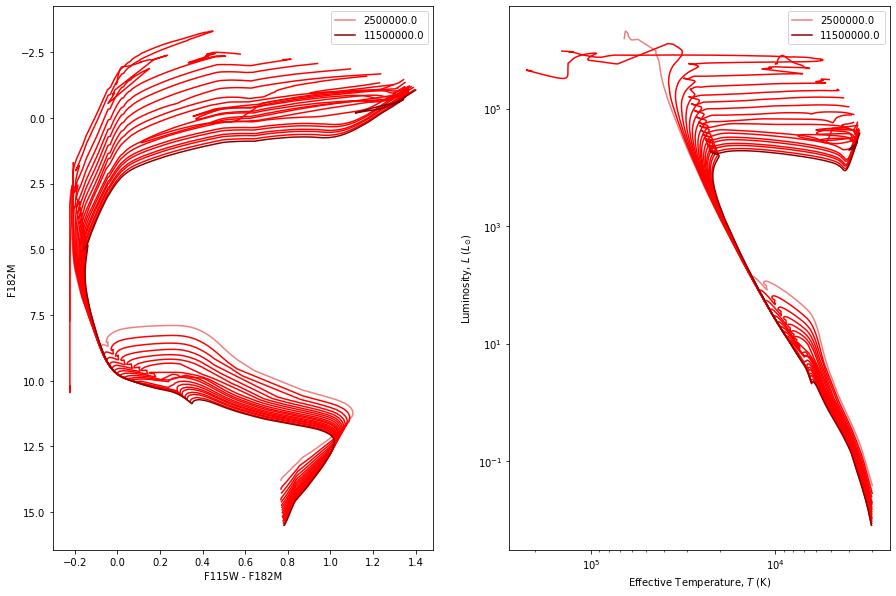

In [9]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 2:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

# Plot HR
py.subplot(1, 2, 2)
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    if i == 0:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'darkred', label=level_age_arr[i])
    else:    
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'red', label='')

py.xscale('log')
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()

py.legend()

In [10]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr')
import interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
skip = [264, 334, 1822, 2863]
for i in range(len(stars)):
    if i in skip:
        continue
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)

# convert luminosity values to solar luminosities
for i in range(len(stars)):
    if i in skip:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun

# print(stars)

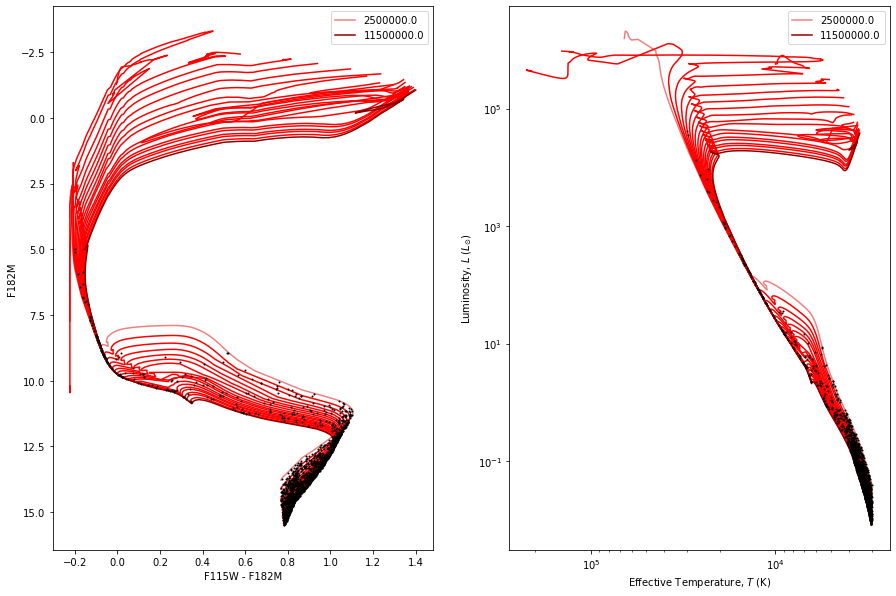

In [11]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)

for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(len(stars)):
    if i in skip or masses[i] < 0.1:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')

# Plot HR
py.subplot(1, 2, 2)

for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    if i == 0:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'darkred', label=level_age_arr[i])
    else:    
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'red', label='')

py.xscale('log')
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()
py.legend()

for i in range(len(stars)):
    if i in skip or masses[i] < 0.1:
        continue
    py.plot(stars[i][1], stars[i][0], marker='o', markersize=1, color='k')